# Salary Exploratory Data Analysis

In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Resources

Connecting Google Sheet to Jupyter Notebook [HERE](https://youtu.be/9PojbQ1z1to?feature=shared)

In [2]:
#Importing salary and length of employment data

# https://docs.google.com/spreadsheets/d/1OjyBdsyUS580Ku83uadnOUV4sRHQIBOuHLLmgeW4EVk/edit#gid=72198648

sheet_id = '1OjyBdsyUS580Ku83uadnOUV4sRHQIBOuHLLmgeW4EVk' # <- creating sheet id object
xls = pd.ExcelFile(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx') #<- creating xls object 
df = pd.read_excel(xls,'Remaining Salaries') # <- importing sheet using xls object
df1 = pd.read_csv(f'/Users/scipio/Downloads/FY 24 Position Control - Position Control Sheet Mar.csv', parse_dates = ['Start Date'])
df1 = df1[['Position ID','Start Date']] # <- subsetting dataset
df = df.merge(df1, on = 'Position ID', how = 'left') # <- merging datasets on the Position ID column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Position ID              255 non-null    object        
 1   Legal First Name         255 non-null    object        
 2   Legal Last Name          255 non-null    object        
 3   Annual Salary Amount     241 non-null    float64       
 4   Regular Pay Rate Amount  255 non-null    float64       
 5   Unnamed: 5               248 non-null    float64       
 6   Hourly Adjustment        255 non-null    int64         
 7   Remaining Pay Periods    255 non-null    int64         
 8   Percentage               255 non-null    float64       
 9   Department Description   255 non-null    object        
 10  Home Department Code     255 non-null    int64         
 11  Employee Group           255 non-null    int64         
 12  Budget Line              255 non-nul

In [4]:
#Data Cleaning
df['Annual Salary Amount'] = df['Annual Salary Amount'].replace('-','0') # <- replacing string values with 0
df['Annual Salary Amount'] = pd.to_numeric(df['Annual Salary Amount']) # <- chaning data type
EDA = df[df['Annual Salary Amount']>0] # <- filtering to return salaried emplpoyees 

EDA = EDA[~EDA['Position ID'].duplicated()] # <- filtering out duplicates
EDA = EDA[['Position ID','Legal First Name','Legal Last Name','Annual Salary Amount','Start Date']] # <- Subsetting relevant columns

EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 7 to 254
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Position ID           148 non-null    object        
 1   Legal First Name      148 non-null    object        
 2   Legal Last Name       148 non-null    object        
 3   Annual Salary Amount  148 non-null    float64       
 4   Start Date            145 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.9+ KB


In [5]:
#Calculating Length of Employment
EDA['Current Month'] = dt.datetime(2024,3,31) # <- Creating datetime object for March 31, 2024
EDA['Employment Length (Years)'] = round((EDA['Current Month'] - EDA['Start Date']).dt.days / 365.25,2) # <- Calculatin length of employment in years

In [6]:
EDA.head()

,Position ID,Legal First Name,Legal Last Name,Annual Salary Amount,Start Date,Current Month,Employment Length (Years)
7,33T000055,Johanna,Soto,102100.68,2009-08-31,2024-03-31,14.58
8,33T000063,Sheria,McRae,187250.00,2010-08-02,2024-03-31,13.66
9,33T000068,Christian,Torino,96389.00,2010-08-02,2024-03-31,13.66
10,33T000079,Jacqueline,Hicks-Martinez,70366.55,2011-05-16,2024-03-31,12.88
14,33T000092,Isabel,Goss,125000.00,2011-08-01,2024-03-31,12.67


In [7]:
#Statistical Annual Metrics
round(EDA.describe(),2)

,Annual Salary Amount,Employment Length (Years)
count,148.00,145.00
mean,78004.83,3.49
std,26904.53,3.64
min,34000.00,0.02
25%,57895.31,0.74
50%,72875.00,1.93
75%,95265.00,4.41
max,187250.00,14.58


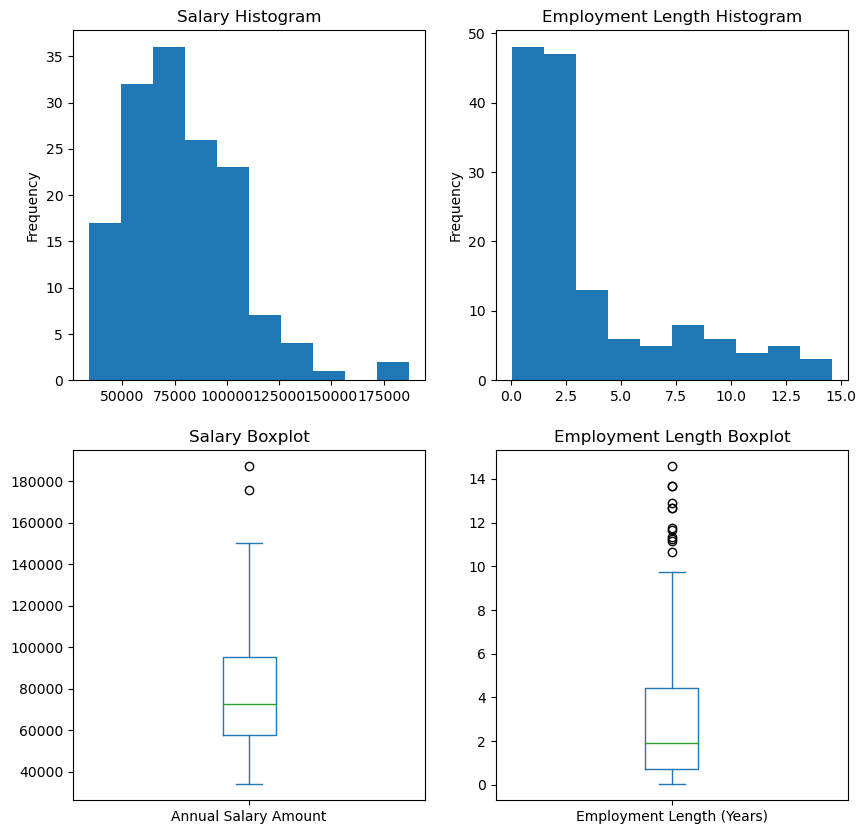

In [8]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10)) # <- Subplot figure 


#Annual Salary Distribution
EDA['Annual Salary Amount'].plot(kind = 'hist', title = 'Salary Histogram', ax = axs[0,0]) # <- Salary histogram
EDA['Employment Length (Years)'].plot(kind = 'hist', title = 'Employment Length Histogram', ax = axs[0,1]) # <- Employment Length Histogram
EDA['Annual Salary Amount'].plot(kind = 'box', ax = axs[1,0], title = 'Salary Boxplot') # <- Salary Boxplot
EDA['Employment Length (Years)'].plot(kind = 'box', ax = axs[1,1], title = 'Employment Length Boxplot') # <- Employment Length Boxplot 
plt.show()

Both the Salary and Employment Length histograms both have a right skew which indicates that the mean is higher than the median due to outliers superficially inflating both the average salary amount and employment length at the organization. In addition to the right skew of both histograms, there are several outliers indicated in each boxplot.

In [9]:
#Salary Outliers
Salary_75 = EDA['Annual Salary Amount'].quantile(0.75) # <- 3rd quartile of salary amount
Salary_25 = EDA['Annual Salary Amount'].quantile(0.25) # < - 1st quartile of salary amount
Salary_IQR = Salary_75 - Salary_25 # <- Salary interquartile range

Upper_Salary_Outlier = Salary_75 + (Salary_IQR * 1.5) # <- Outlier above 3rd quartile
Lower_Salary_Outlier = Salary_25 - (Salary_IQR * 1.5) # <- Outlier below 1st quartile

print('Employees with a salary greater than or eqaul to',f'${Upper_Salary_Outlier:,}', 'have an Annual Salary Amount that is considered to be an outlier. Employees with a salary less than or equal to',f'${Lower_Salary_Outlier:,}','have an Annual Salary Amount that is considered an outlier')

Employees with a salary greater than or eqaul to $151,319.53125 have an Annual Salary Amount that is considered to be an outlier. Employees with a salary less than or equal to $1,840.78125 have an Annual Salary Amount that is considered an outlier


In [10]:
#Employment Length Outliers
Emp_Length_75 = EDA['Employment Length (Years)'].quantile(0.75)# <- 3rd quartile of employment length
Emp_Length_25 = EDA['Employment Length (Years)'].quantile(0.25)# <- 1st quartile of employment length
Emp_Length_IQR = Emp_Length_75 - Emp_Length_25 # <- Employment length interquartile range

Upper_Emp_Length_Outlier = round(Emp_Length_75 + (Emp_Length_IQR * 1.5),2) # <- Outlier above 3rd quartile
Lower_Emp_Length_Outlier = round(Emp_Length_25 - (Emp_Length_IQR * 1.5),2) # <- Outlier below 1st quartile

print('An outlier is an employee that has been employed for greater than or equal to',Upper_Emp_Length_Outlier,'years.')

An outlier is an employee that has been employed for greater than or equal to 9.91 years.


In [11]:
print('There are',EDA[(EDA['Annual Salary Amount'] >= Upper_Salary_Outlier) | (EDA['Annual Salary Amount']<= Lower_Salary_Outlier)].shape[0],'staff members that have an Annual Salary Amount that are considered to be outliers.')

There are 2 staff members that have an Annual Salary Amount that are considered to be outliers.


In [12]:
#Employees with an Annual Salary Amount that are considered to be outliers in the dataset
EDA[(EDA['Annual Salary Amount'] >= Upper_Salary_Outlier) | (EDA['Annual Salary Amount']<= Lower_Salary_Outlier)]

,Position ID,Legal First Name,Legal Last Name,Annual Salary Amount,Start Date,Current Month,Employment Length (Years)
8,33T000063,Sheria,McRae,187250.0,2010-08-02,2024-03-31,13.66
172,33T000671,Andre,Moore,175950.0,2023-01-30,2024-03-31,1.17


In [13]:
print('There are',EDA[EDA['Employment Length (Years)'] >= Upper_Emp_Length_Outlier].shape[0],'staff members that have an Employment Length in years that is considered to be an outlier.')

There are 12 staff members that have an Employment Length in years that is considered to be an outlier.


In [14]:
#Employees that have an Employment Length (Years) that is considered to be an outlier
EDA[EDA['Employment Length (Years)'] >= Upper_Emp_Length_Outlier].sort_values(by = 'Employment Length (Years)')

,Position ID,Legal First Name,Legal Last Name,Annual Salary Amount,Start Date,Current Month,Employment Length (Years)
21,33T000173,Thomas,Dougherty,93129.00,2013-07-29,2024-03-31,10.67
20,33T000142,Calvin,McRae,86900.00,2013-02-01,2024-03-31,11.16
19,33T000140,Vianney,Anzures,86900.00,2013-01-02,2024-03-31,11.24
18,33T000139,Damien,Castagne,95220.00,2012-12-03,2024-03-31,11.32
17,33T000120,Kali,Erstein,93129.00,2012-07-30,2024-03-31,11.67
16,33T000114,Barbara,Zjawin,98648.00,2012-07-02,2024-03-31,11.75
14,33T000092,Isabel,Goss,125000.00,2011-08-01,2024-03-31,12.67
15,33T000094,Alice,Lubrano-Weiss,96389.00,2011-08-01,2024-03-31,12.67
10,33T000079,Jacqueline,Hicks-Martinez,70366.55,2011-05-16,2024-03-31,12.88
8,33T000063,Sheria,McRae,187250.00,2010-08-02,2024-03-31,13.66
